## **About Aweshome**

Aweshome is a chatbot created by implementing machine learning in it. Its manufacture is carried out as an additional feature that will complement the smart home application created that also called Aweshome.
This application has a motto:

***Aweshome: Make your home smart and awesome ***

The chatbot feature will help users explicitly manage the appliances in their house, as well as to know the condition of their house.

# **Steps to create Aweshome Chatbot**

The following is an overview of the steps taken to create an Aweshome chatbot:
1. Prepare the required packages, including the Deep Learning, Tensorflow, Keras, Pickle, and NLTK (Natural Language Processing Toolkit) libraries.
2. Prepare a dataset in the form of a collection of user input and output that must be displayed in response to the Aweshome chatbot. The file is saved in JSON type and is named "intents."
3. Perform data preparation including import required packages, load the JSON file and extract the required data.
4. Creating models including training and testing models.
5. Integrating Aweshome chatbot with application.



In [1]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
with open('intents.json') as content:
  data1 = json.load(content)

In [3]:
#getting all the data to lists
tags = []
patterns = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    patterns.append(lines)
    tags.append(intent['tag'])

In [4]:
#converting to dataframe
data = pd.DataFrame({"inputs":patterns,
                     "tags":tags})

In [5]:
#printing the data
data

,inputs,tags
0,Hi,salam1
1,Halo,salam1
2,Hello,salam1
3,Helo,salam1
4,Apa kabar,salam1
...,...,...
233,Keluarkan pakaiannya sekarang,jemuran_keluar
234,Keluarkan pakaiannya sekarang,jemuran_keluar
235,Pastikan pakaiannya sudah dikeluarkan,jemuran_keluar
236,Pakaiannya keluarin ke dalam ya,jemuran_keluar


In [6]:
data = data.sample(frac=1)

In [7]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
92,pastikan lampunya menyala sekarang,lampu_nyala
83,bagaimana kondisi lampu saat ini tolong dinyal...,lampu_nyala
14,assalamualaikum warohmatulloh,salam2
51,bagaimana kondisi pintu di rumah saat ini,kondisi_rumah
178,hari sudah gelap tutuplah pintunya,pintu_tutup
...,...,...
175,pintunya sudah ditutup,pintu_tutup
54,bye,perpisahan
72,hatur nuhun,terima_kasih
151,pintunya sudah dibuka,pintu_buka


In [9]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(data['tags'])

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [11]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = lbl_encoder.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  195
output length:  14


In [12]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(12,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [13]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [14]:
#training the model
train = model.fit(x_train,y_train,epochs=500)

Epoch 1/500
8/8 [==============================] - 2s 7ms/step - loss: 2.6312 - accuracy: 0.1429
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 2.6156 - accuracy: 0.1555
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 2.5959 - accuracy: 0.1513
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 2.5664 - accuracy: 0.1471
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 2.5362 - accuracy: 0.1429
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 2.5069 - accuracy: 0.1387
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 2.4884 - accuracy: 0.1387
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 2.4799 - accuracy: 0.1387
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 2.4703 - accuracy: 0.1387
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 2.4615 - accuracy: 0.1387
Epoch 11/500
8/8 [===========

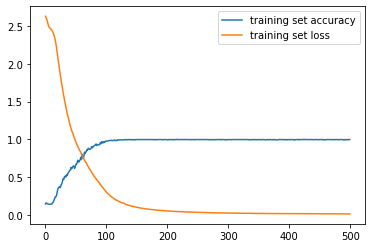

In [15]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [16]:
model.save("chat_model")

import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


INFO:tensorflow:Assets written to: chat_model/assets


In [18]:
import random

while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()
  response_tag = lbl_encoder.inverse_transform([output])[0]

  #finding the right tag and predicting
  response_tag = lbl_encoder.inverse_transform([output])[0]
  if response_tag == "kondisi_rumah":
    kondisiLampu = "nyala"
    kondisiPintu = "terkunci"
    kondisiGas = "aman"
    print("Aweshome: Saat ini lampu dalam kondisi {0}, pintu dalam keadaan {1}, dan kompor gas dalam kondisi {2}".format(kondisiLampu, kondisiPintu, kondisiGas))
  elif response_tag == "perpisahan":
    break
  else:
    print("Aweshome : ",random.choice(responses[response_tag]))  

You : Hello
Aweshome :  Hai, apakah Anda perlu bantuan?
You : Kamu siapa?
Aweshome :  Hai, ini dengan Aweshome. Ada yang bisa saya bantu?
You : Tolong matikan lampu
Aweshome :  Siap, lampu sudah mati
You : Nyalakan lampu sekarang
Aweshome :  Siap, lampu sudah menyala
You : Angkat jemurannya
Aweshome :  Jemuran sudah dimasukkan ke dalam rumah
You : Keluarkan jemurannya
Aweshome :  Siap,saat ini jemuran sudah dikeluarkan
You : Tutup pintunya
Aweshome :  Sip, pintu sudah dikunci.
You : Buka pintunya dong
Aweshome :  Pintu sudah dibuka
You : Bagaimana kondisi rumah saat ini?
Aweshome: Saat ini lampu dalam kondisi nyala, pintu dalam keadaan terkunci, dan kompor gas dalam kondisi aman
You : Bagaimana kondisi lampu saat ini?
Aweshome: Saat ini lampu dalam kondisi nyala, pintu dalam keadaan terkunci, dan kompor gas dalam kondisi aman
You : Bagaimana kondisi kompor gas di rumah?
Aweshome: Saat ini lampu dalam kondisi nyala, pintu dalam keadaan terkunci, dan kompor gas dalam kondisi aman
You : B